## Welcome

This notebook is a

Requirement:
Before I could start with the loading data. I stomped over the topic absolute and relative paths. Of course I don't want to use relative paths online. Instead I will use relative paths. This explanation is also explained here -> https://towardsdatascience.com/simple-trick-to-work-with-relative-paths-in-python-c072cdc9acb9


- Option 1: use OS lib
- Option 2: use tf.keras.utils.image_dataset_from_directory(path)
- Option 3: glob.glob

In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import pathlib as Path
import cv2
import matplotlib.pyplot as plt

root_dir = '../../Datasets/chest_xray/' # Start from here to find the Dataset without absolute path

In [2]:
#Path Fun 
print(os.getcwd()) # print (__file__) doesn't work so I have to to use this command. Returns current working directory 
print(os.listdir()) # Show Files on current working directory
print(os.path.realpath(os.path.join(os.getcwd(), '..', '..', 'Datasets', 'chest_xray'))) # go two directories up and then Open /Datasets/chest_xray/
print(os.listdir(root_dir)) # Show current working directory

c:\Users\gorge\Documents\GitHub\ds_python
['.git', 'load_data.ipynb', 'README.md']
C:\Users\gorge\Documents\Datasets\chest_xray
['test', 'train', 'val']


Option 1: Use the libary os with os.walk(), os.listdir() 


['NORMAL', 'PNEUMONIA']
Example for train/NORMAL filenames:  ../../Datasets/chest_xray//train\NORMAL\IM-0115-0001.jpeg
Example for train/PNEUMONIA filenames:  ../../Datasets/chest_xray//train\PNEUMONIA\person1000_bacteria_2931.jpeg
Show total of NORMAL files in train dataset:  1341
Show total of PNEUMONIA files in train dataset:  3875
Show the total of train dataset:  5216


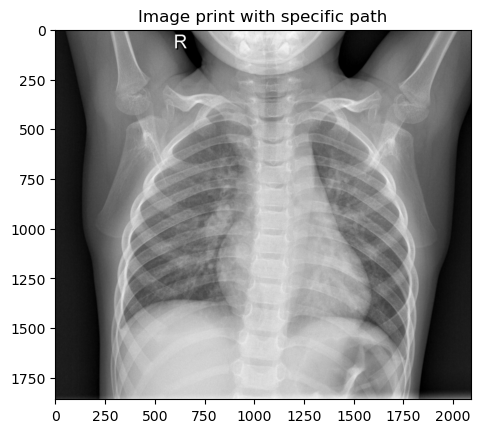

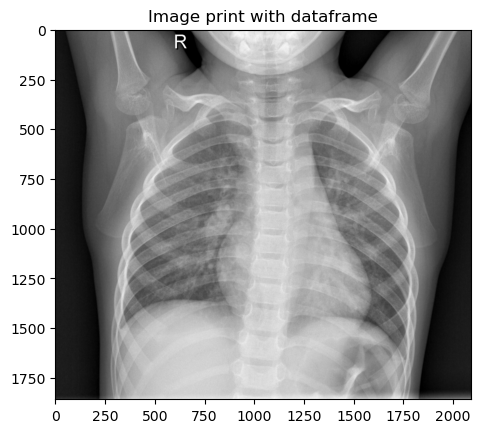

In [4]:
train_dir = root_dir + '/train' # start with train dataset
print(os.listdir(train_dir))

normal_filenames= []
pneumonia_filenames = []

for root, d_names, f_names in os.walk(train_dir): # os.walk() generates a 3-tuple of root, directory and filenames
    if 'NORMAL' in root:
        for filename in f_names:
            normal_filenames.append(os.path.join(root, filename))
    elif 'PNEUMONIA' in root:
        for filename in f_names:
            pneumonia_filenames.append(os.path.join(root, filename))
        

print ('Example for train/NORMAL filenames: ', normal_filenames[0])
print ('Example for train/PNEUMONIA filenames: ', pneumonia_filenames[0])

# Show total of NORMAL and PNEUMONIA files in train dataset
print ('Show total of NORMAL files in train dataset: ', len(normal_filenames))
print ('Show total of PNEUMONIA files in train dataset: ', len(pneumonia_filenames))
print ('Show the total of train dataset: ', len(normal_filenames) + len(pneumonia_filenames))

# Store Images into a pandas dataframe
df_os_train = pd.DataFrame()
df_os_train['Image'] = pd.DataFrame(data=normal_filenames)

# Show Image 
img = cv2.imread( normal_filenames[0]) # Use Filname List, path
plt.figure(1)
plt.title('Image print with specific path')
plt.imshow(img)

# Show Image 
img2 = cv2.imread(df_os_train['Image'].iloc[0]) # Use Dataframe, also path
plt.figure(2)
plt.title('Image print with dataframe')
plt.imshow(img2)


# Option Pillow Library

Doesn't work ...

In [5]:
from PIL import Image


# Option Keras 

Found 5216 files belonging to 2 classes.


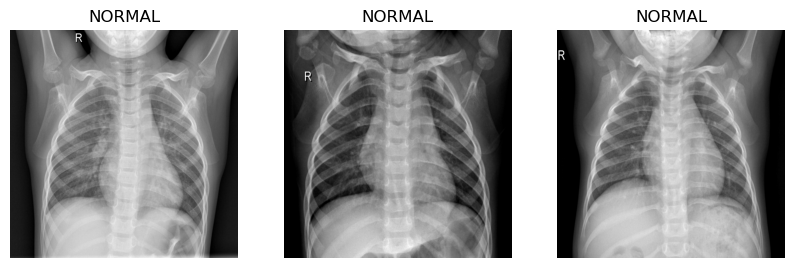

In [6]:
# Keras Preprocessing with image_dataset_from_direcotry approach

from keras.preprocessing.image import load_img
main_path = root_dir
train_path = os.path.join(main_path,"train/NORMAL/")
train_ds = tf.keras.utils.image_dataset_from_directory('C:/Users/gorge/Documents/Datasets/chest_xray/train/', label_mode='int', shuffle=False,seed=123, image_size=(1000, 1000),batch_size=32)

plt.figure(figsize=(10, 10))
class_names = train_ds.class_names
for images, labels in train_ds.take(1):
    for i in range(3):
        ax = plt.subplot(1, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
        



# Option glob

- glob.glob()
- convert it with np.concatenate() into a dataframe

Train path:  ../../Datasets/chest_xray/train
    class                                              image
0  Normal  ../../Datasets/chest_xray/train/NORMAL\IM-0115...
1  Normal  ../../Datasets/chest_xray/train/NORMAL\IM-0117...
2  Normal  ../../Datasets/chest_xray/train/NORMAL\IM-0119...
3  Normal  ../../Datasets/chest_xray/train/NORMAL\IM-0122...
4  Normal  ../../Datasets/chest_xray/train/NORMAL\IM-0125...
Shape:  (5216, 2)
1341
3875


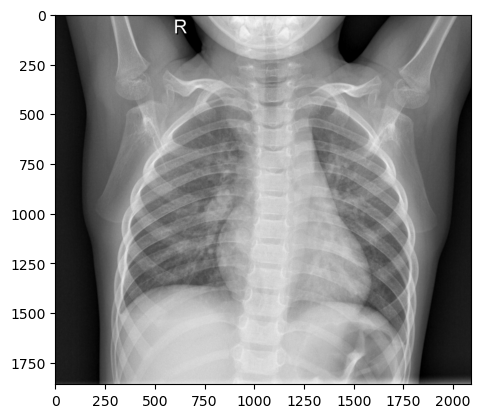

In [7]:
# Option with glob
import glob

train_path = os.path.join(root_dir,"train")
print('Train path: ', train_path)

train_normal = glob.glob(train_path+"/NORMAL/*.jpeg")
train_pneumonia = glob.glob(train_path+"/PNEUMONIA/*.jpeg")

train_list = [x for x in train_normal]
train_list.extend([x for x in train_pneumonia])

df_train = pd.DataFrame(np.concatenate([['Normal']*len(train_normal) , ['Pneumonia']*len(train_pneumonia)]), columns = ['class'])
df_train['image'] = [x for x in train_list]
print(df_train.head())
print('Shape: ', df_train.shape)
print(len(df_train.loc[df_train['class'].isin(['Normal'])]))
print(len(df_train.loc[df_train['class'].isin(['Pneumonia'])]))

img = cv2.imread(df_train['image'].iloc[0])
plt.imshow(img)
plt.show()

# Different Approch from Kaggle

In [12]:
train_folder= root_dir + 'train/'

# train 
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

#Normal pic 
print(len(os.listdir(train_n)))
rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)

norm_pic_address = train_n+norm_pic

#Pneumonia
rand_p = np.random.randint(0,len(os.listdir(train_p)))

sic_pic =  os.listdir(train_p)[rand_norm]
sic_address = train_p+sic_pic
print('pneumonia picture title:', sic_pic)

# Load the images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)


1341
normal picture title:  IM-0339-0001.jpeg
pneumonia picture title: person1088_virus_1800.jpeg
